In [1]:
import os
from natsort import natsorted
import pydicom
from pydicom import dcmread
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [29]:
import SimpleITK as sitk
def getPixelDataWithSitk(patient_path):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(patient_path)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    return sitk.GetArrayFromImage(image)


In [2]:
base = 'data/train/'
path_to_save = 'out_plots/'

  0%|          | 0/176 [00:00<?, ?it/s]

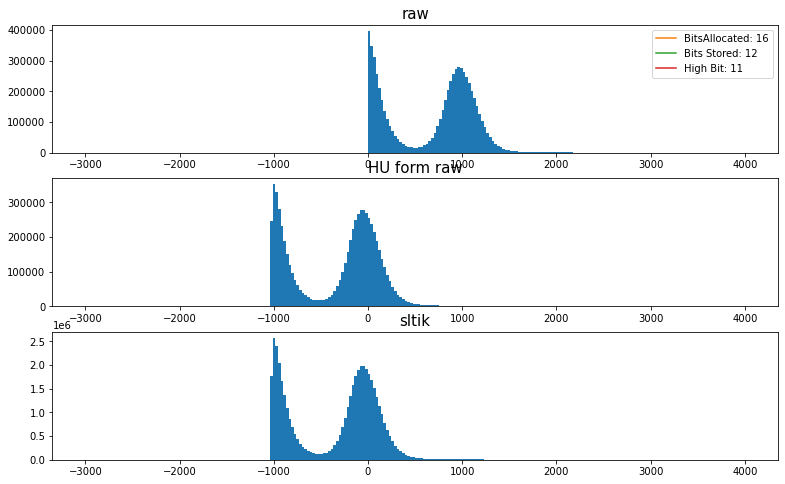

  0%|          | 0/176 [00:02<?, ?it/s]


In [28]:
exclusion_list = [] 
for pacient in tqdm(os.listdir(base)):
#     print(pacient)
    pacient_im_names = os.listdir(base+pacient)
    pacient_im_names = natsorted(pacient_im_names)
    slices = [pydicom.dcmread(base+pacient+'/'+file) for file in pacient_im_names]
    try:
        slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    except:
        exclusion_list.append(pacient)
        continue
        
    
    
    j = 1
    l = len(slices)
    pix_vals = np.array([])
#     plt.figure(figsize=(15, 15))
    for i in range(l):
        if int(l/25) > 0:
            if i%int(l/25) == 0 and j<26:
                try:
                    plt.subplot(5,5,j)
                    plt.axis('off')
                    plt.imshow(slices[i].pixel_array)
                    plt.subplots_adjust(wspace=0.01, hspace=0.01)
                    pix_vals = np.append(pix_vals, slices[i].pixel_array)
                    j+=1
                except:
                    exclusion_list.append(pacient)
        else:
            try:
                plt.subplot(5,5,j)
                plt.axis('off')
                plt.imshow(slices[i].pixel_array)
                plt.subplots_adjust(wspace=0.01, hspace=0.01)
                pix_vals = np.append(pix_vals, slices[i].pixel_array)
                j+=1
            except:
                exclusion_list.append(pacient)
    plt.savefig(f'out_plots/raw_{pacient}.png')
    plt.close()
    plt.figure(figsize=(13,8))
    
    plt.subplot(3,1,1)
    plt.hist(pix_vals, bins=250, range=(-3000, 4000))
    plt.plot([], [], label=f'BitsAllocated: {slices[i].BitsAllocated}')
    plt.plot([], [], label=f'Bits Stored: {slices[i].BitsStored}')
    plt.plot([], [], label=f'High Bit: {slices[i].HighBit}')
    plt.legend()
    plt.title('raw', fontsize=15)
    
    plt.subplot(3,1,2)
    slope = slices[i].RescaleSlope
    itersecept = slices[i].RescaleIntercept
    plt.hist(pix_vals*slope+itersecept, bins=250, range=(-3000, 4000))
    plt.title('HU form raw', fontsize=15)
    
    data = getPixelDataWithSitk(base+pacient)
    plt.subplot(3,1,3)
    plt.hist(data.ravel(), bins=250, range=(-3000, 4000))
    plt.title('sltik', fontsize=15)
    
    plt.show()
    plt.savefig(f'out_plots/hist_raw_{pacient}.png')
    plt.close()

In [7]:
exclusion_list

['ID00132637202222178761324',
 'ID00026637202179561894768',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID00011637202177653955184',
 'ID001286